## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


### Loading the dataset

In [2]:
df=pd.read_csv('Crop_yield.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
### Dropping 'Unnamed column'
df.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.tail()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [7]:
df.shape

(28242, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
## Checking for nulls
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [11]:
df.duplicated().sum()

2310

In [12]:
## Dropping duplicates
df.drop_duplicates(inplace=True)


In [13]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [14]:
df.duplicated().sum()

0

In [15]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
    
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [17]:
df=df.drop(to_drop)

In [18]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [19]:
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].astype(np.float64)

In [20]:
len(df['Area'].unique())

101

### Graph Frequency against Area

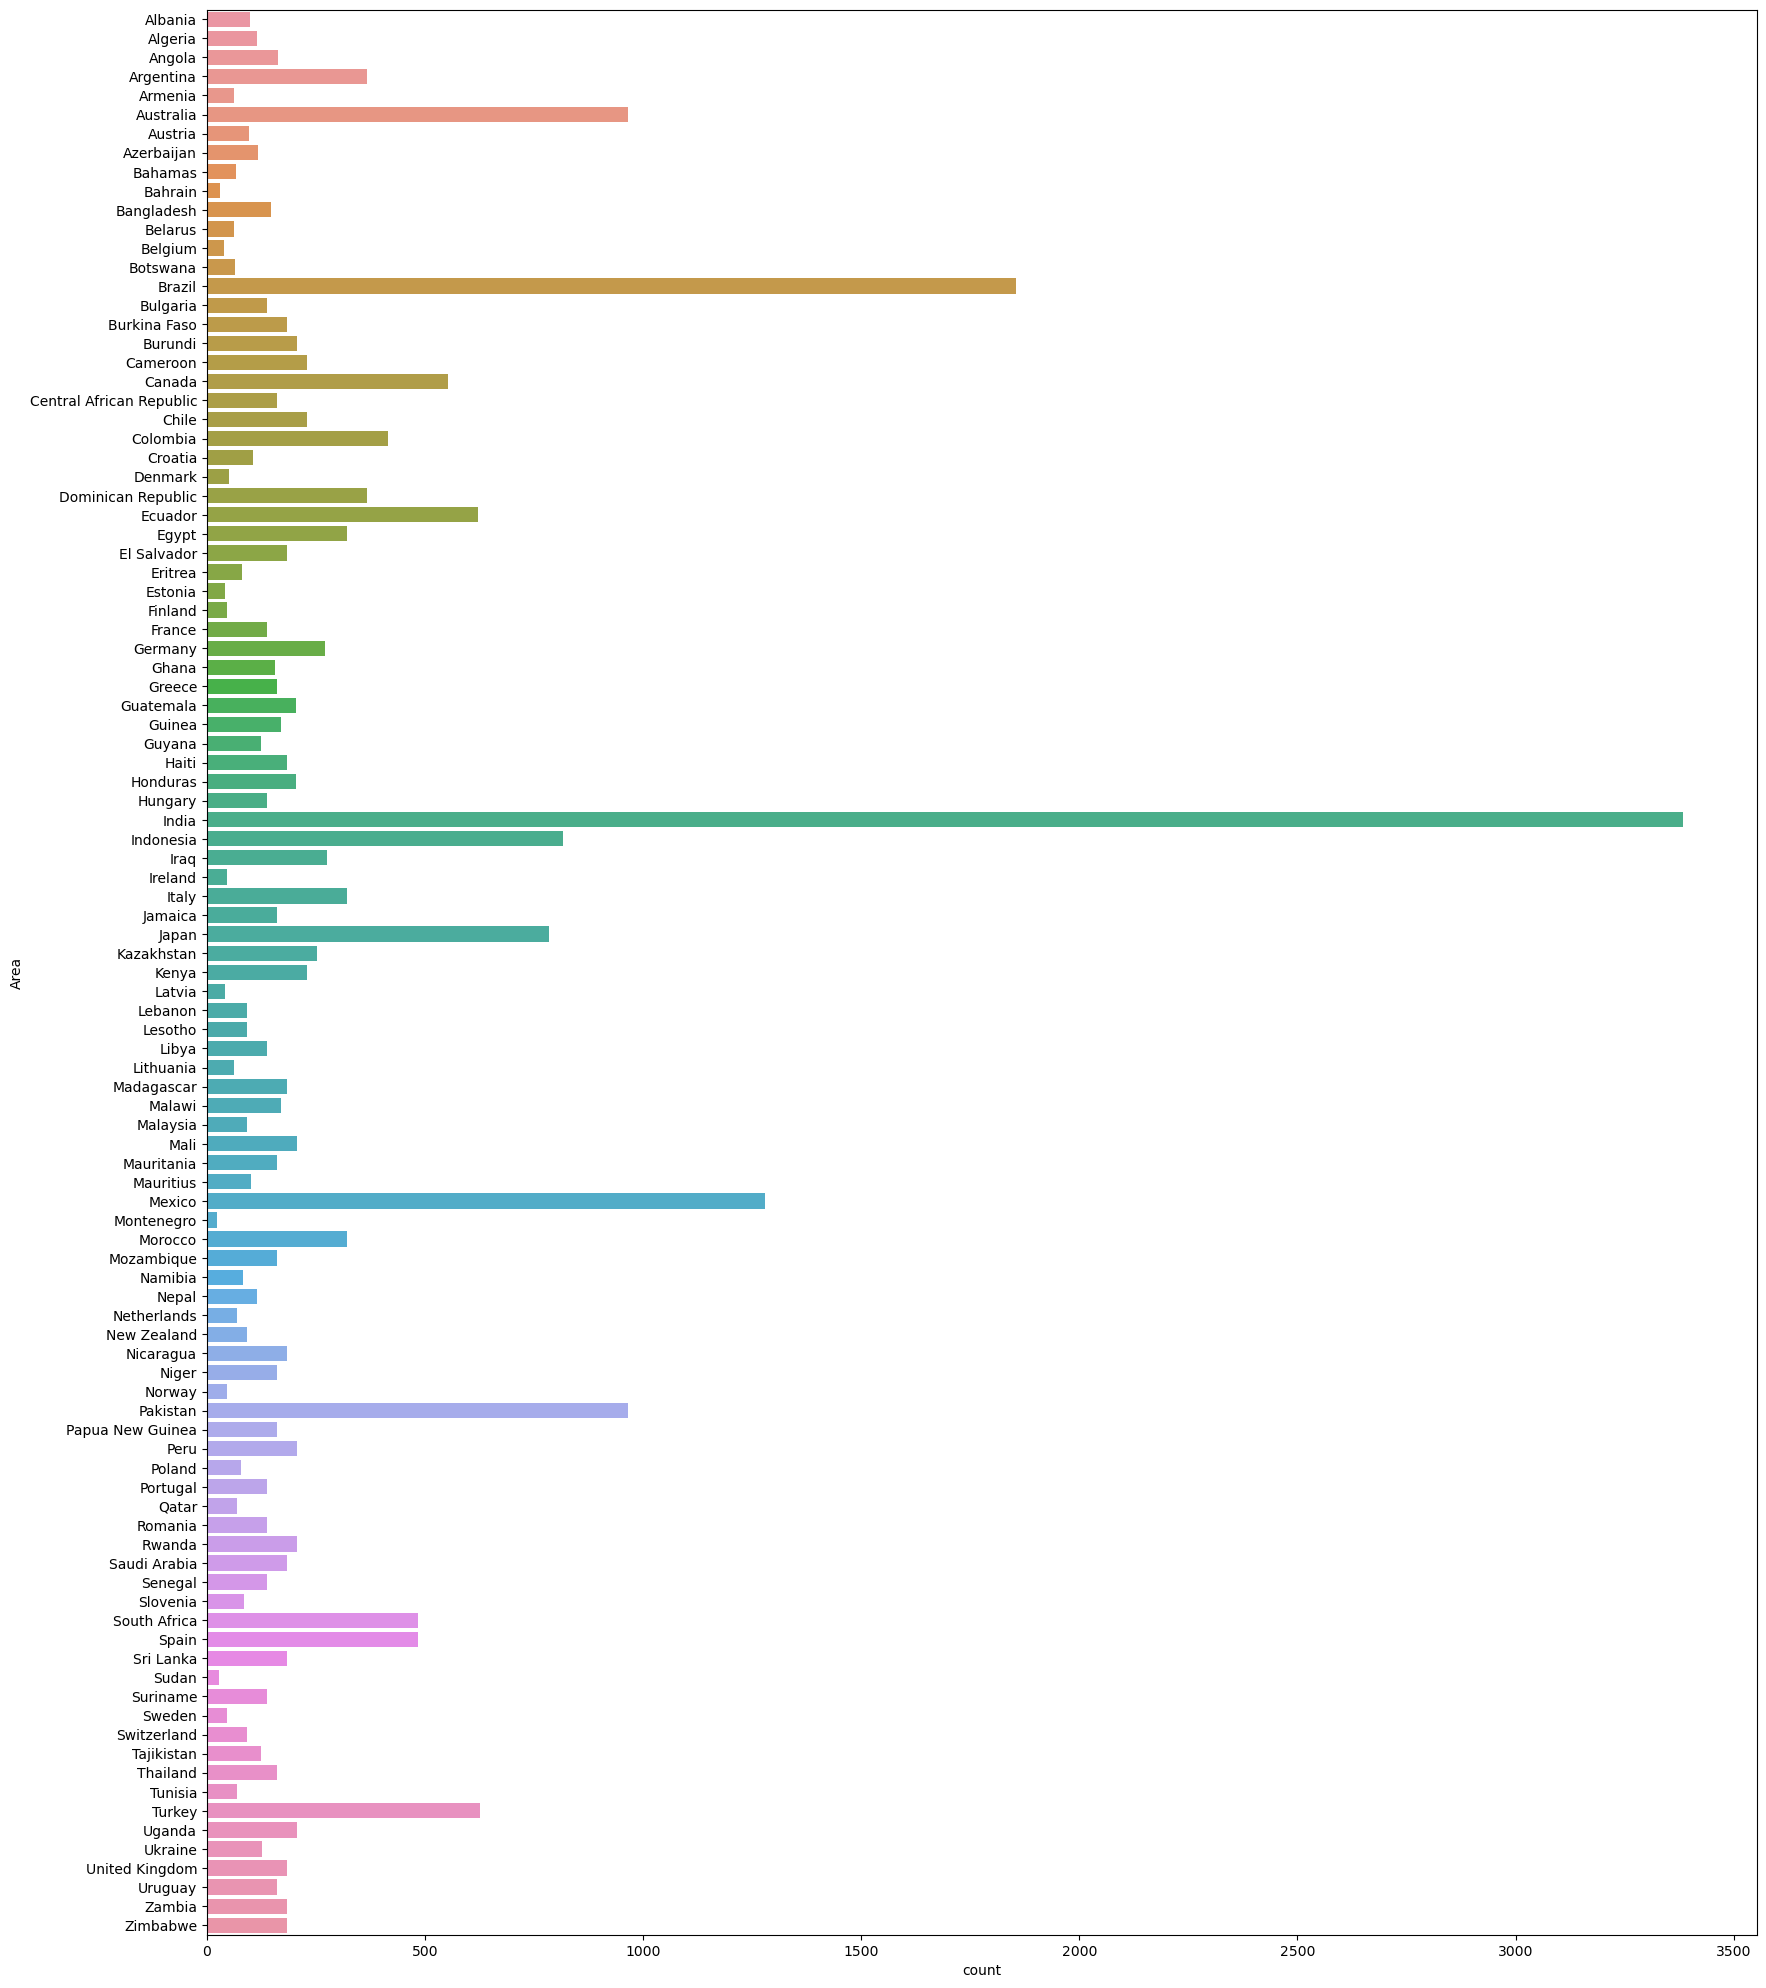

In [22]:
plt.figure(figsize=(20, 25))
sns.countplot(y=df['Area'])
plt.show()

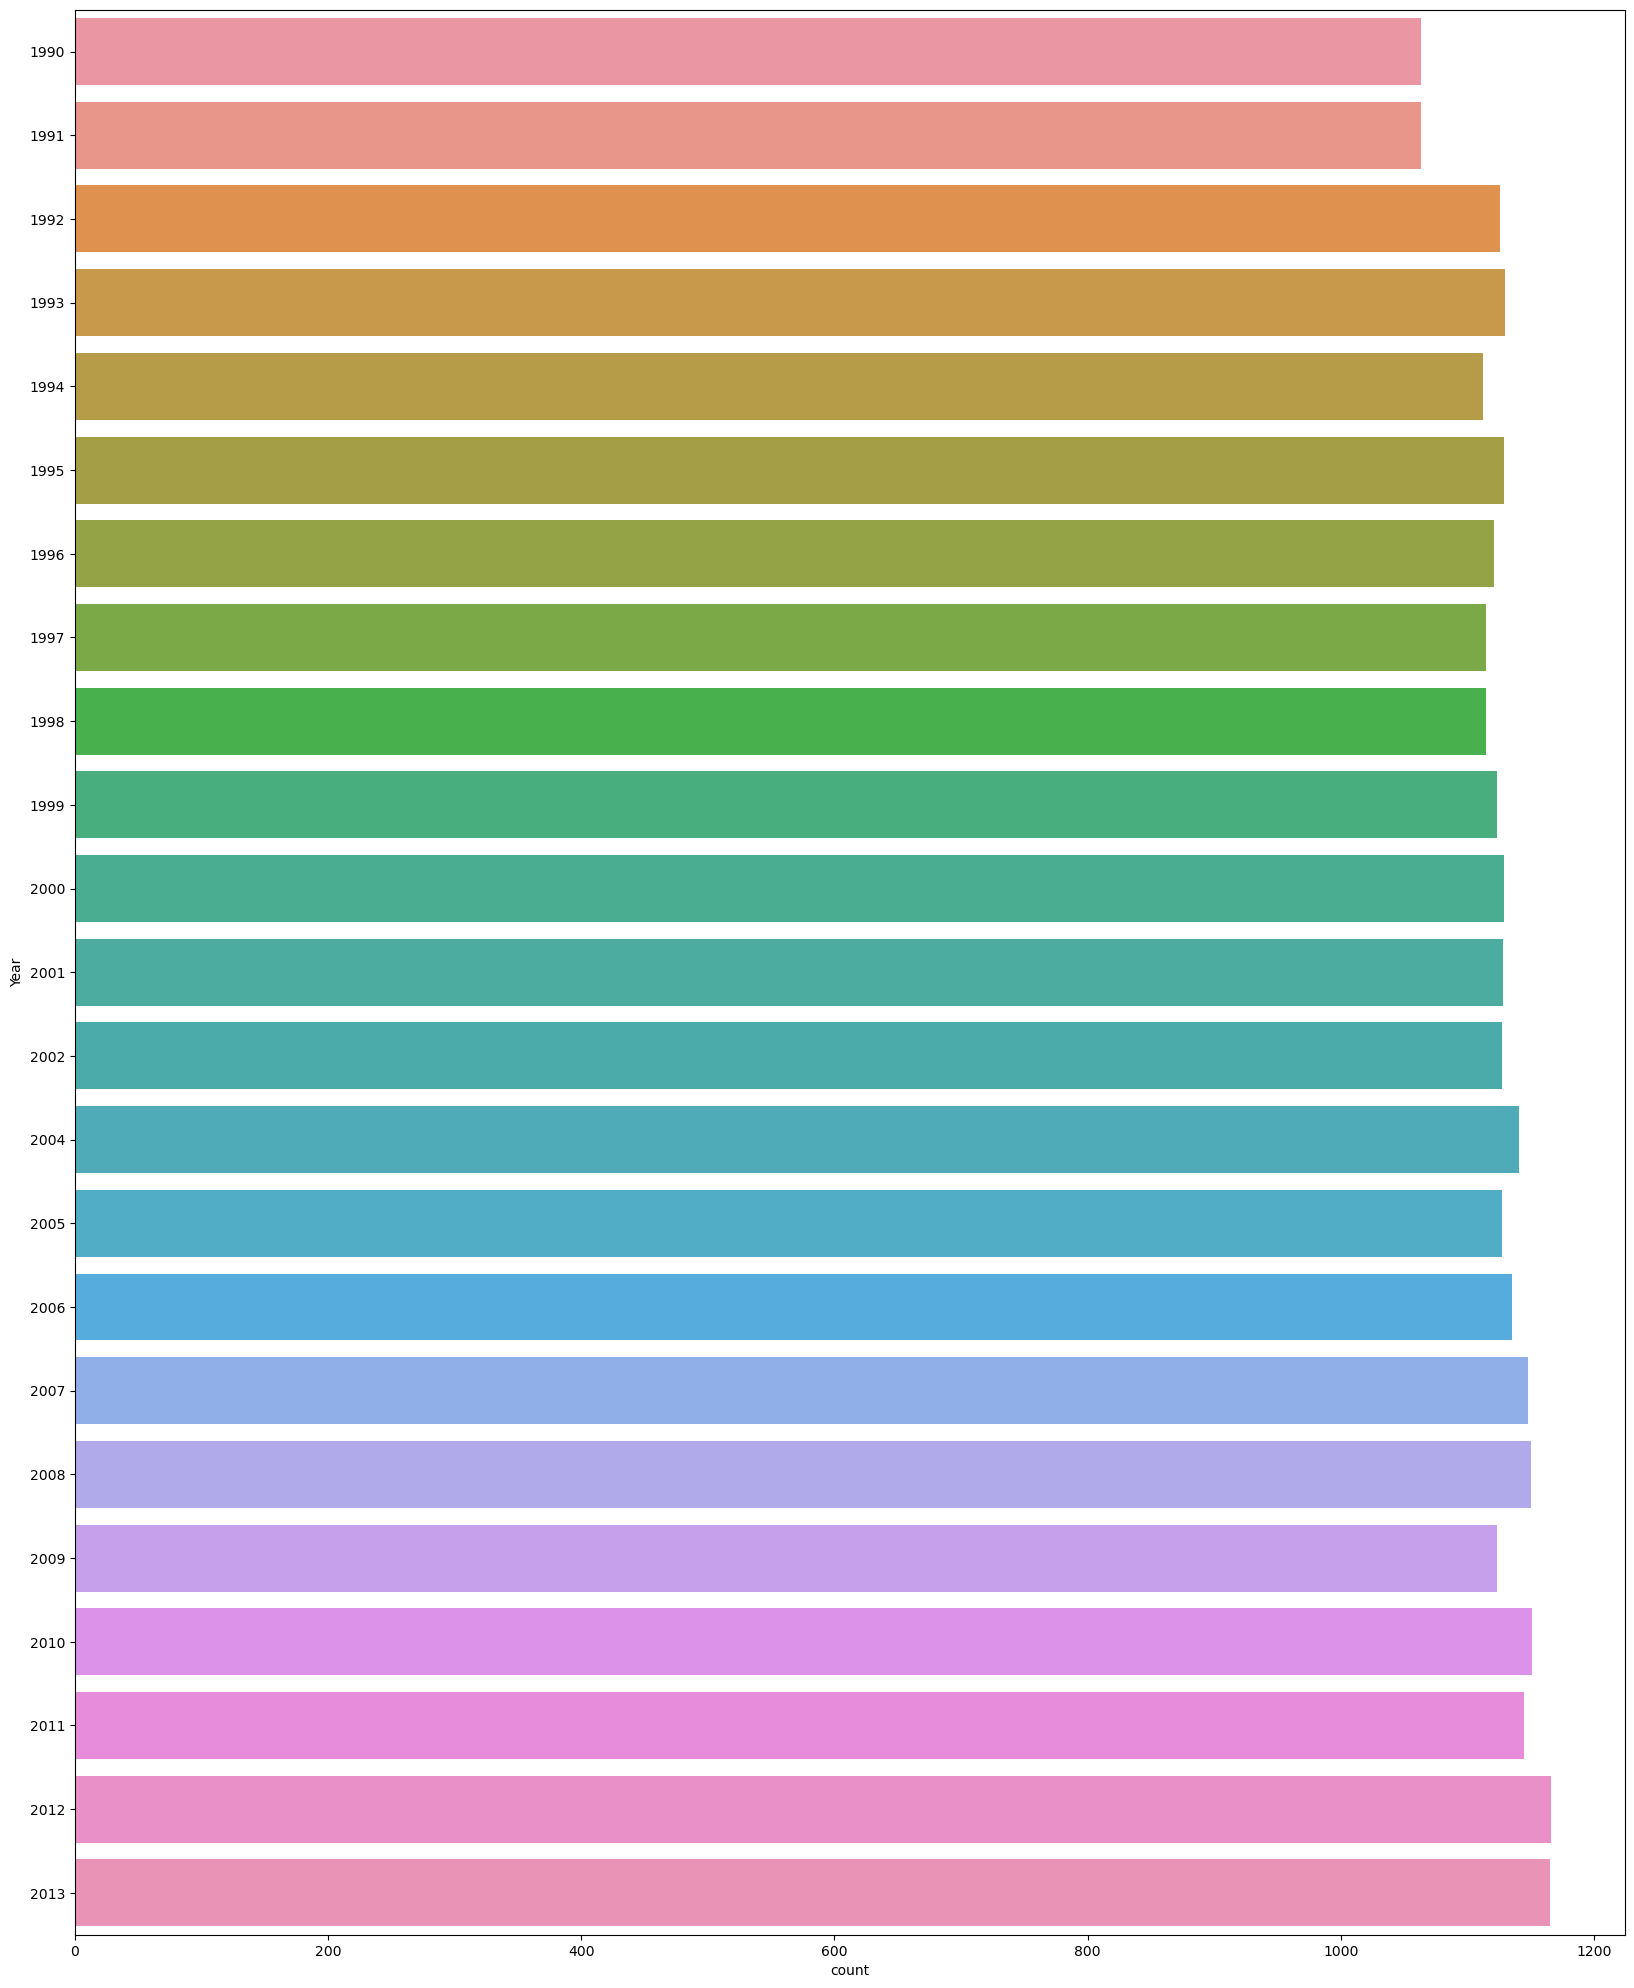

In [23]:
plt.figure(figsize=(20, 25))
sns.countplot(y=df['Year'])
plt.show()

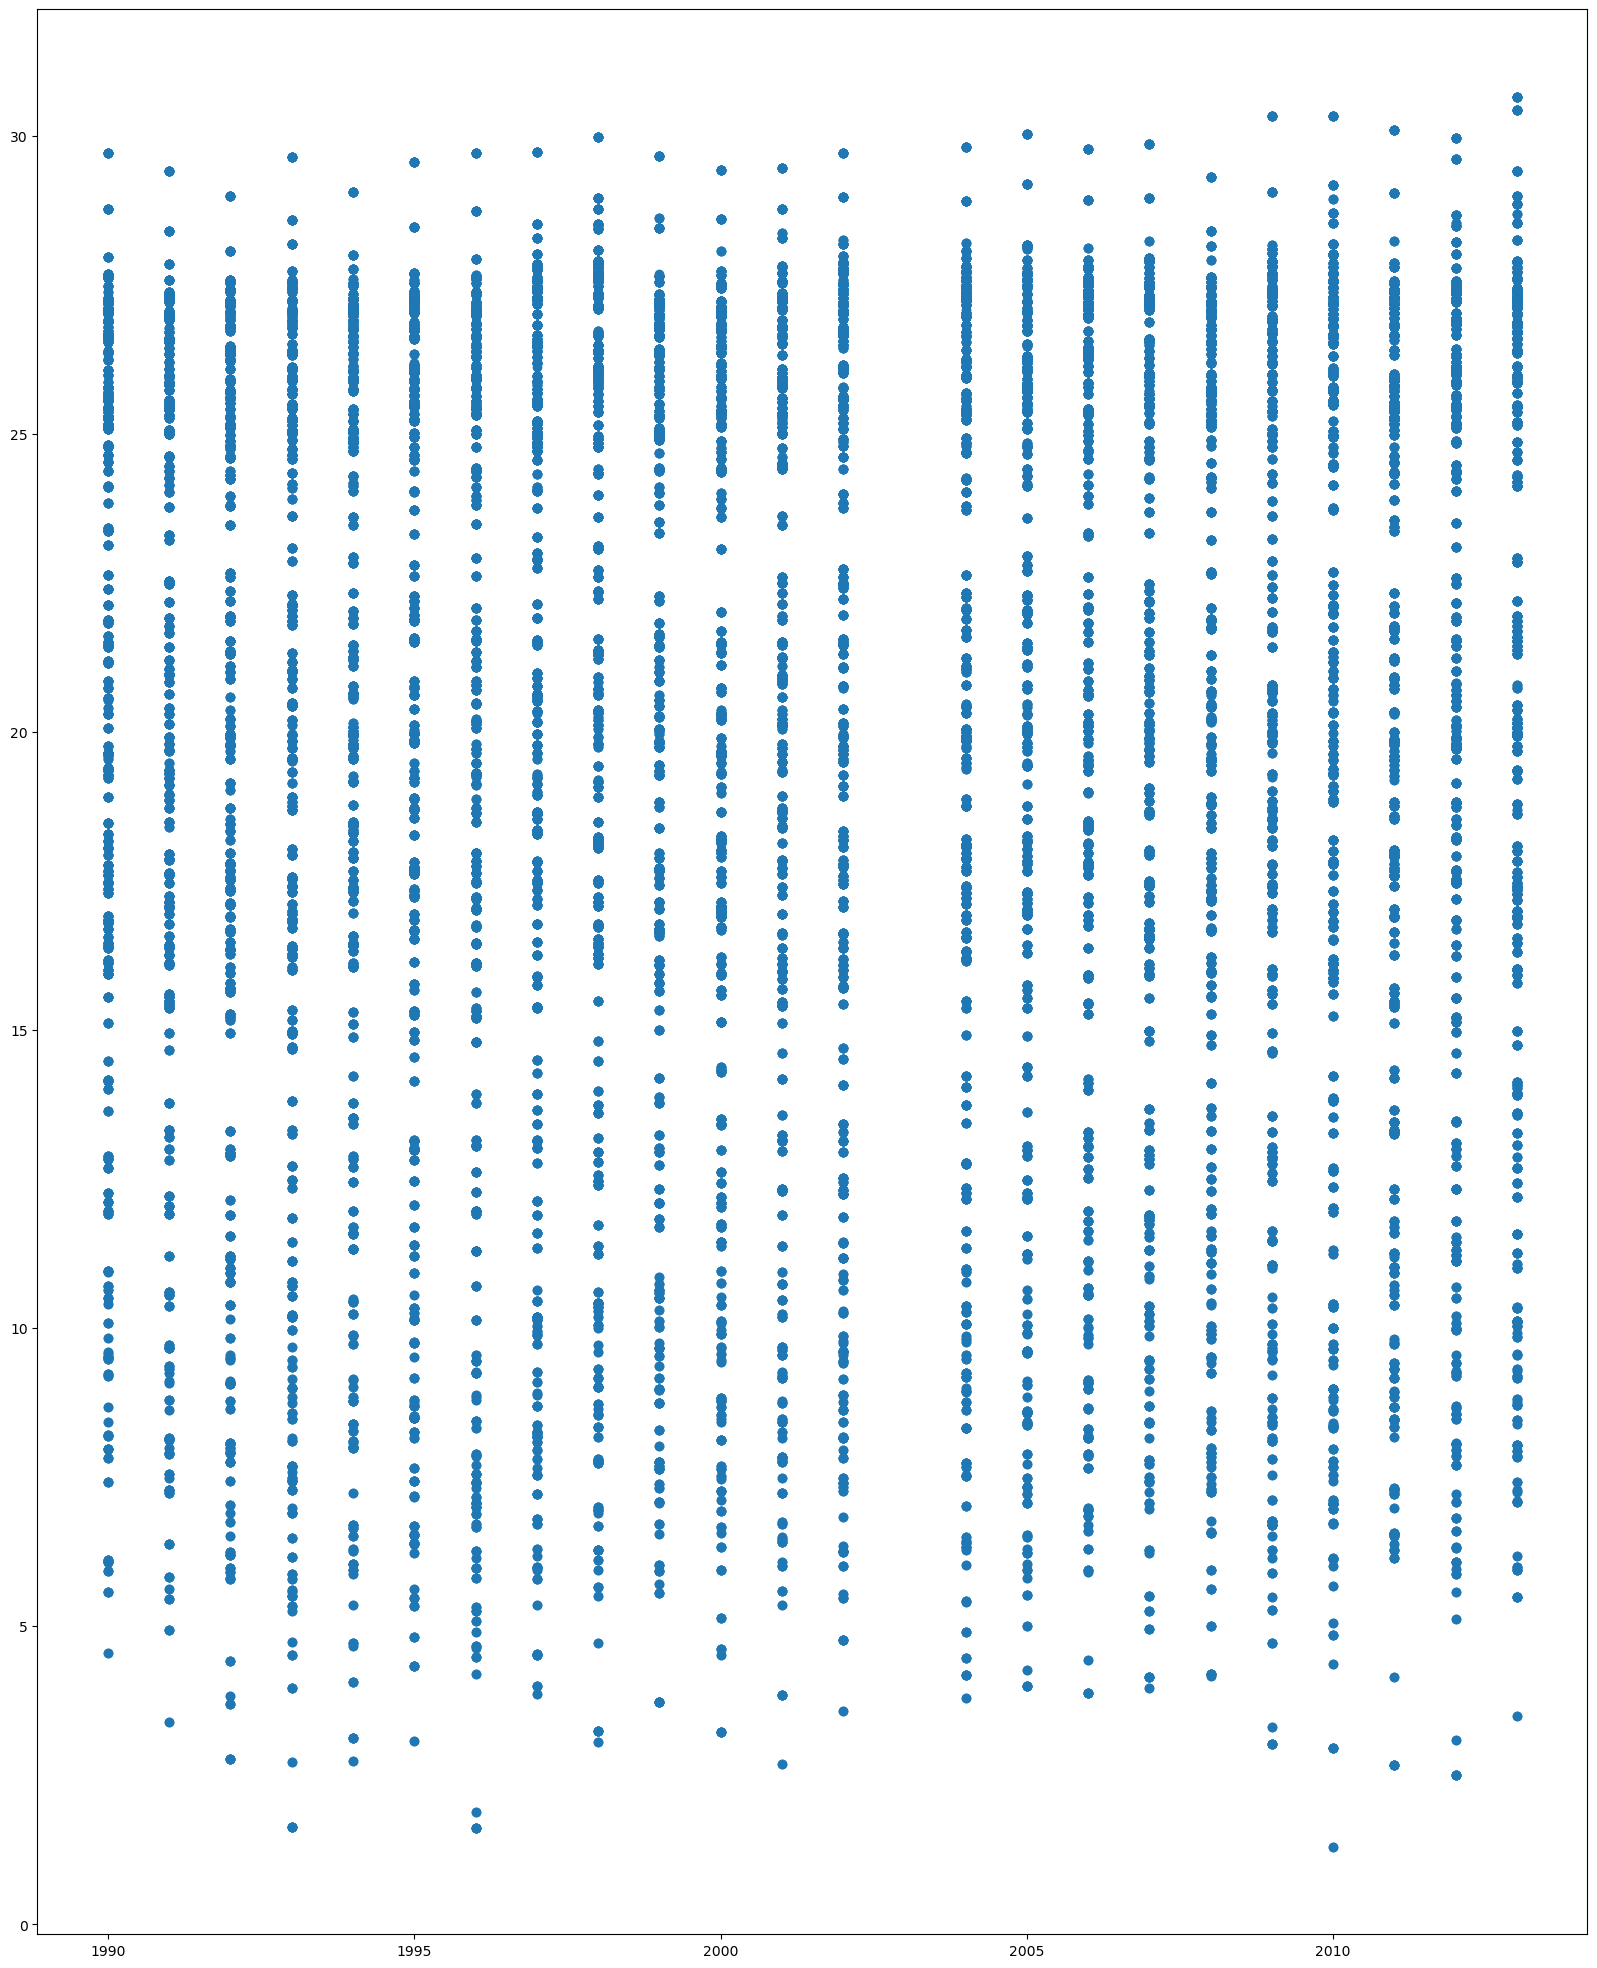

In [29]:
plt.figure(figsize=(20, 25))
plt.scatter(y=df['avg_temp'], x=df['Year'])
plt.show()

In [32]:
df.head(3)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37


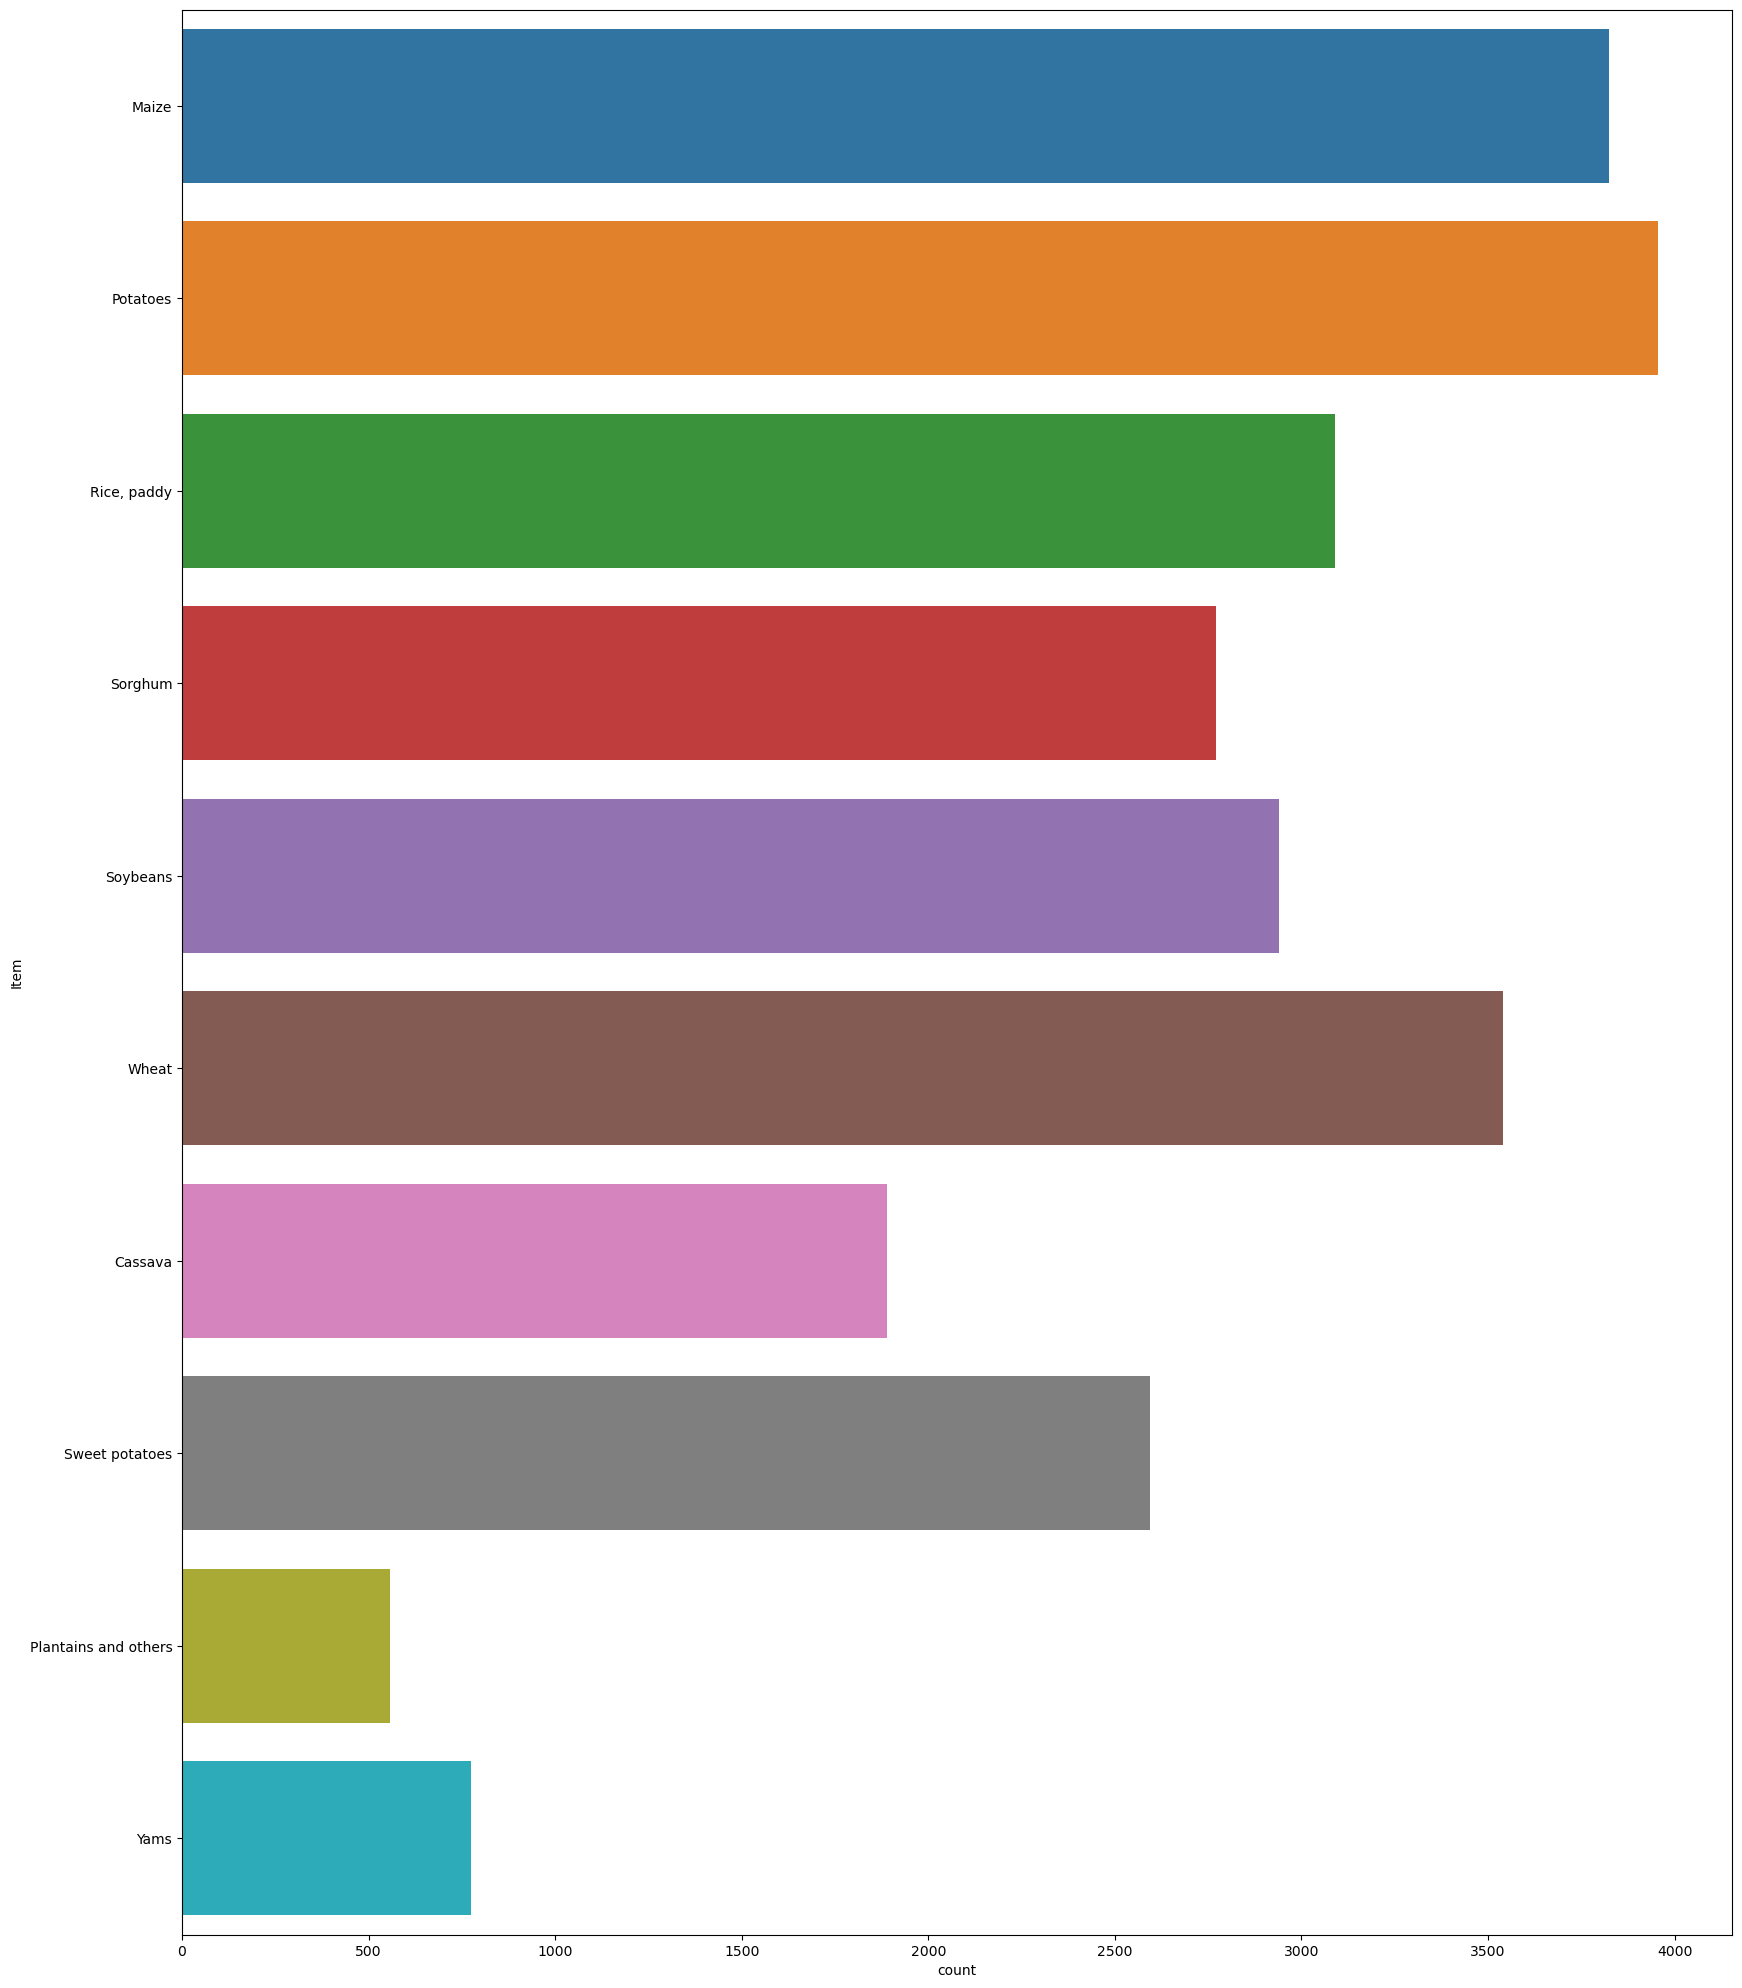

In [30]:
plt.figure(figsize=(20, 25))
sns.countplot(y=df['Item'])
plt.show()

### Yield Per Country

In [37]:
country=df['Area'].unique()
yield_per_country=[]
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())
                                                     

In [39]:
sum_per_country=df['hg/ha_yield'].sum()


In [40]:
sum_per_country

1996196943

In [41]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [45]:
leng=df['hg/ha_yield'].value_counts()

    
    

In [46]:
average=sum_per_country/leng

In [49]:
average / 1000000

hg/ha_yield
10000       19.961969
20000       20.369357
100000      24.644407
25000       60.490816
50000       68.834377
             ...     
30026     1996.196943
7807      1996.196943
43939     1996.196943
54762     1996.196943
22888     1996.196943
Name: count, Length: 11514, dtype: float64

# Yield Per Country Graph

<Axes: >

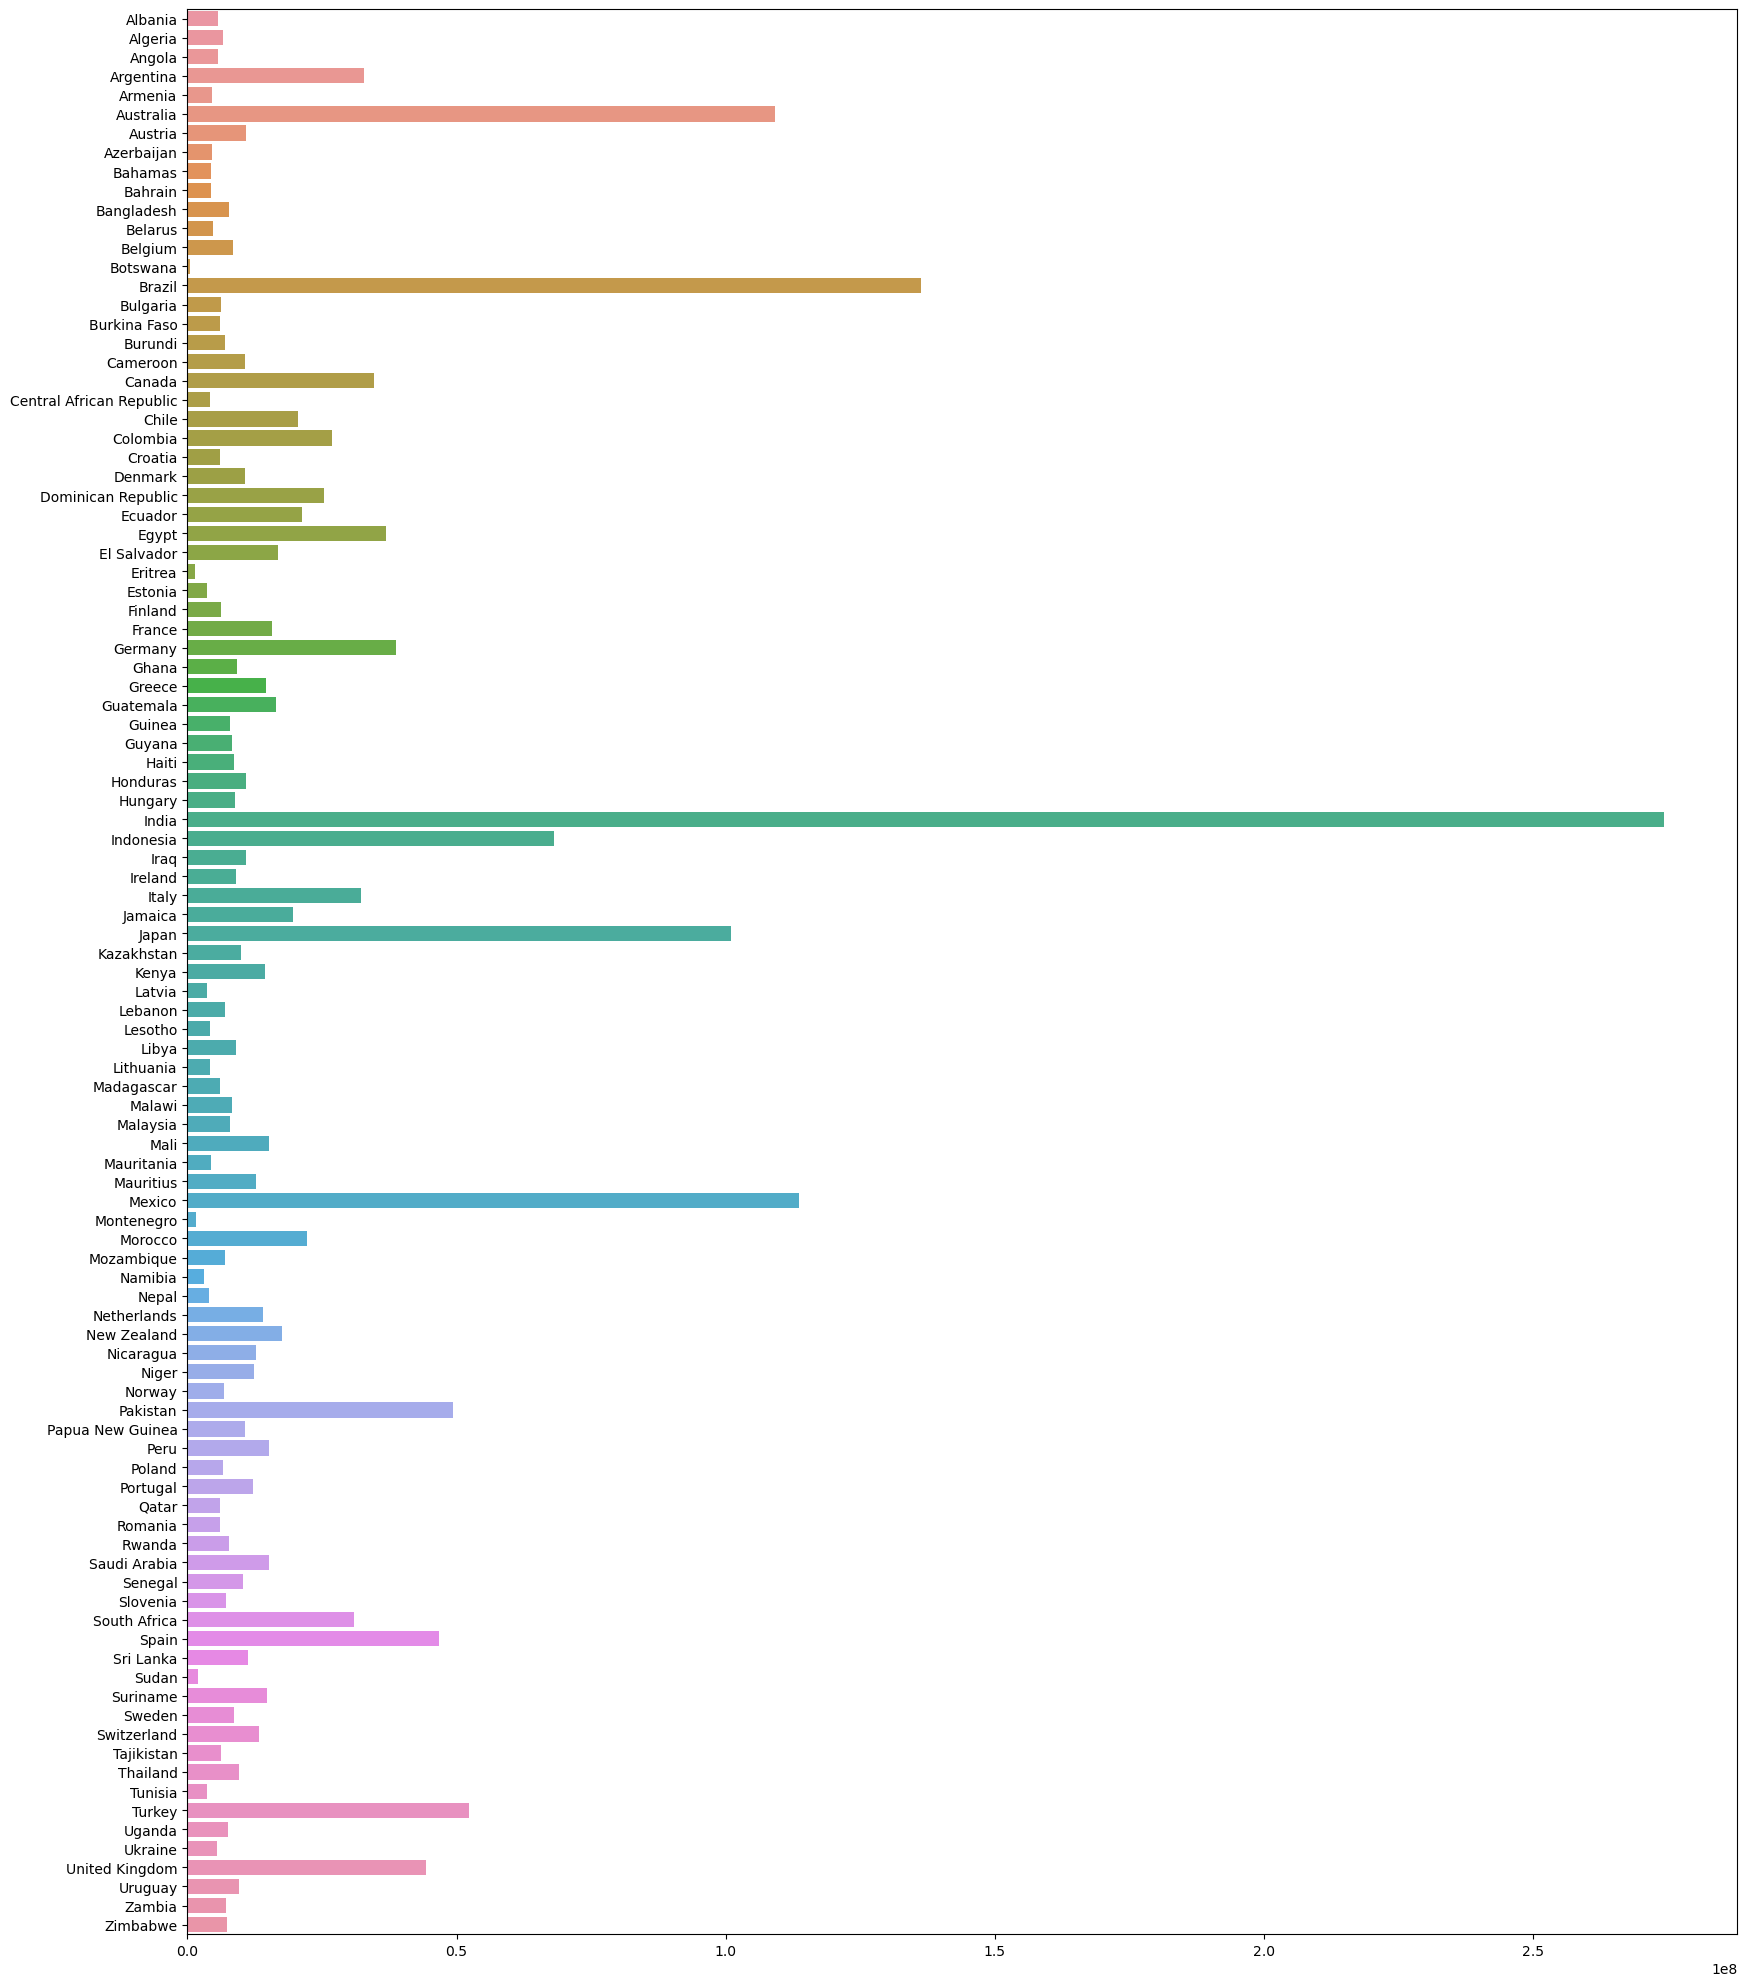

In [50]:
plt.figure(figsize=(20, 25))
sns.barplot(y=country, x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

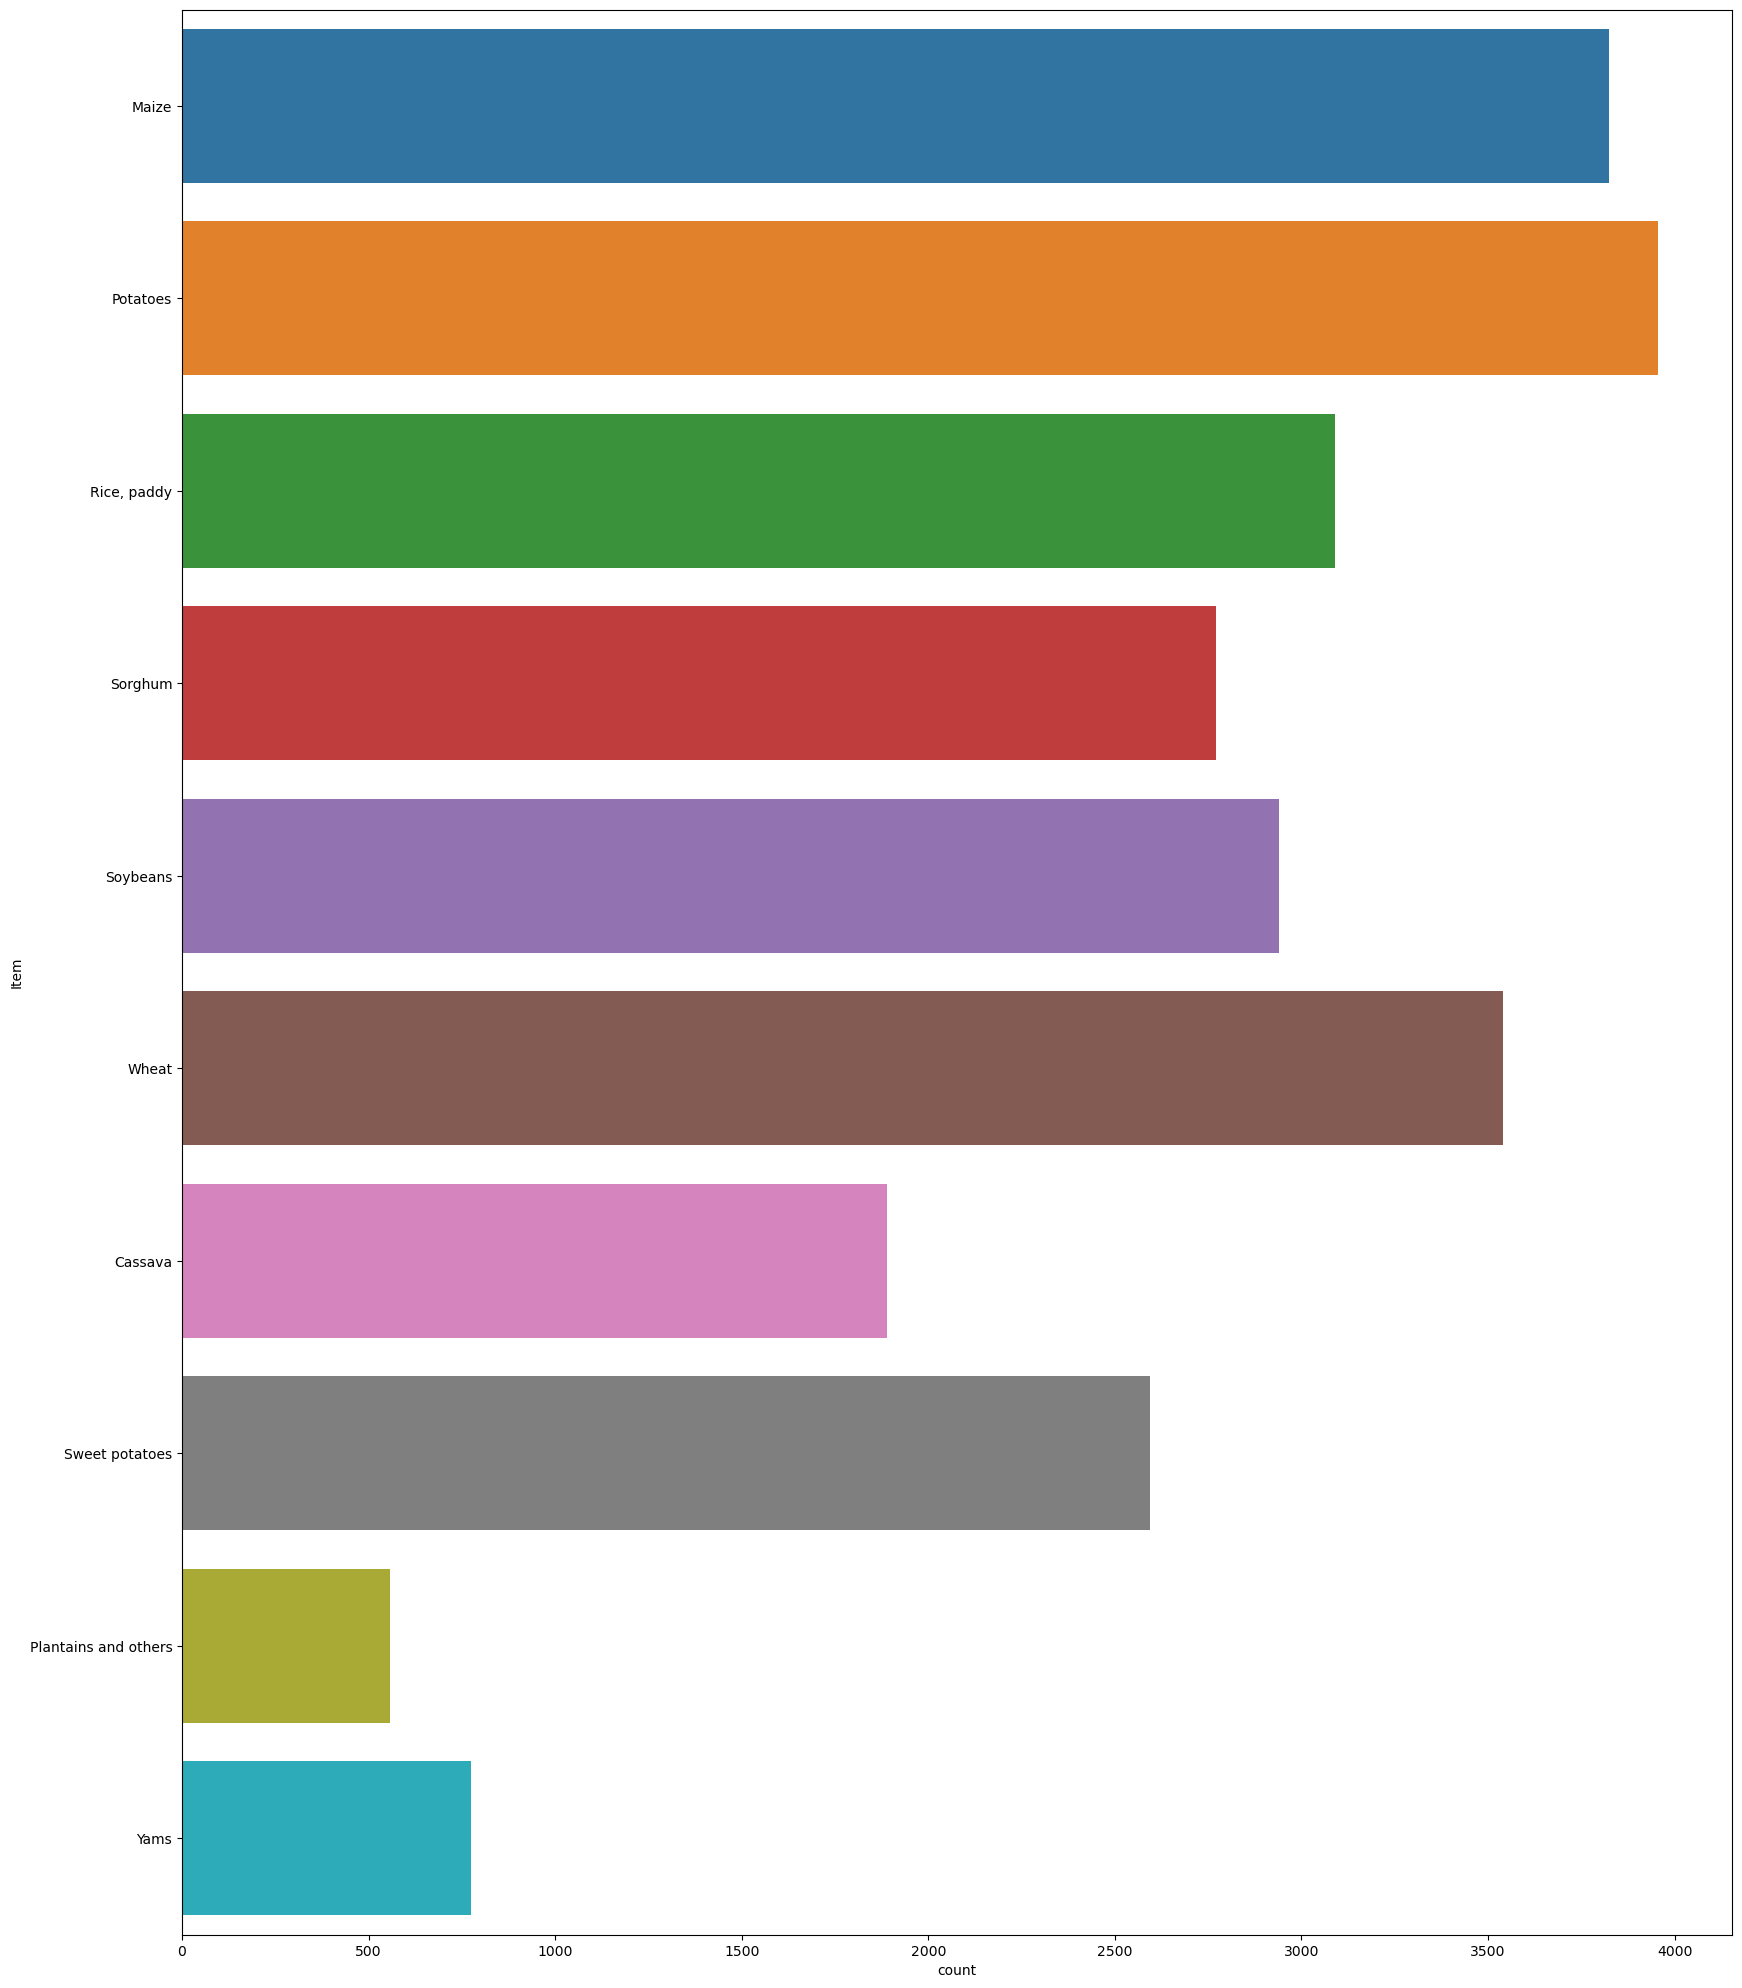

In [51]:
plt.figure(figsize=(20, 25))
sns.countplot(y=df['Item'])

### Plot Yied Vs Item

In [53]:
crops=df['Item'].unique()
yield_per_crop=[]
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())
    

<Axes: >

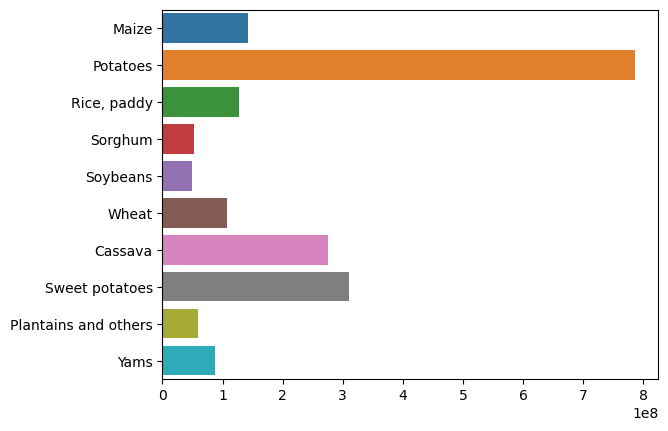

In [54]:
sns.barplot(y=crops,x=yield_per_crop)

# Feature Selection for Train Test Split

In [55]:
dep_cols = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[dep_cols]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

### Converting Categorical to Numerical and Scaling the values

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
ohe=OneHotEncoder(drop='first')
scale=StandardScaler()

preprocesser=ColumnTransformer(
transformers=[
    ('StandardScale', scale, [0, 1, 2, 3]),
    ('OHE', ohe, [4, 5]),
],
remainder='passthrough'
)


In [58]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [60]:
preprocesser.get_feature_names_out(dep_cols[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

## It's Time to train our model


In [62]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error, r2_score


In [63]:
models ={
    'lr': LinearRegression(),
    'lss': Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}

for name, md, in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred=md.predict(X_test_dummy)
    print(f"{name} : Mean Absolute Error (mae): {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")
    

lr : Mean Absolute Error (mae): 29907.49546498524 score : 0.7473129161265559


C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


lss : Mean Absolute Error (mae): 29893.99762450549 score : 0.7473261756207235
Rid : Mean Absolute Error (mae): 29864.860746630722 score : 0.747304177060638
Dtr : Mean Absolute Error (mae): 3890.1767881241567 score : 0.980318800818542


In [64]:

dtr=DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 15011., 34879., 79048.])

### Prediction Pipeline

In [65]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [66]:
result

array([36613.])

In [67]:
### Saving the model in a pickle format
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))